## **Capstone Project: Predicting Term Deposit Subscription**

### **Exploratory Data Analysis (EDA)**

## **1. Importing the Libraries**

In [ ]:
#Load the packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import files
from IPython.display import Image

%matplotlib inline

## **2. Getting the data**

In [ ]:
#Load the data
bank = pd.read_csv('bank-full-finaldata.csv')

In [ ]:
#View the data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## **3. Structure Investigation**

In [ ]:
#Show columns of the data
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#Show size of the dataset
bank.shape

(45211, 17)

In [ ]:
#Count how many times each data type is present in the dataset
pd.value_counts(bank.dtypes)

object    10
int64      7
dtype: int64

## **3.1 Structure of non-numerical features**

In [ ]:
#Display non-numerical features
bank.select_dtypes(exclude="number").head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
bank.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## **3.2 Structure of numerical features**

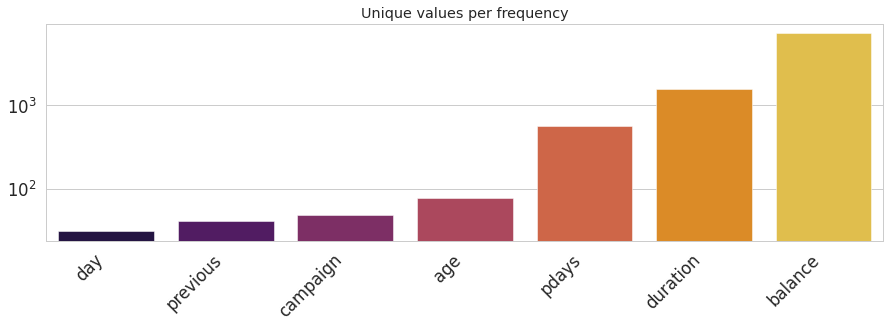

In [ ]:
#For each numerical feature compute number of unique entries
unique_values = bank.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

## **3.3 Conclusion of structure investigation**

There are 45,211 rows and 17 columns (including our target variable) in our dataset. Out of the 17 variables, 10 of them are categorical and 7 are numerical. There are columns that have 'unknown' as data, but we may keep them as they are not unusual. Further investigation will be done on section 6.0.

## **4. Quality Investigation**

## **4.1. Duplicates**

In [ ]:
#Checking for duplicate values
bank.duplicated().sum()

0

In [ ]:
duplicate = bank[bank.duplicated()]
duplicate

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


## **4.2. Missing values**

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### *Note: Missing values from initial dataset do not exist, but if we dive deeper to each of the variables, there are 'unknown' values. We will take a look into each variables on section 6.0*

## **4.2.1. Per sample**

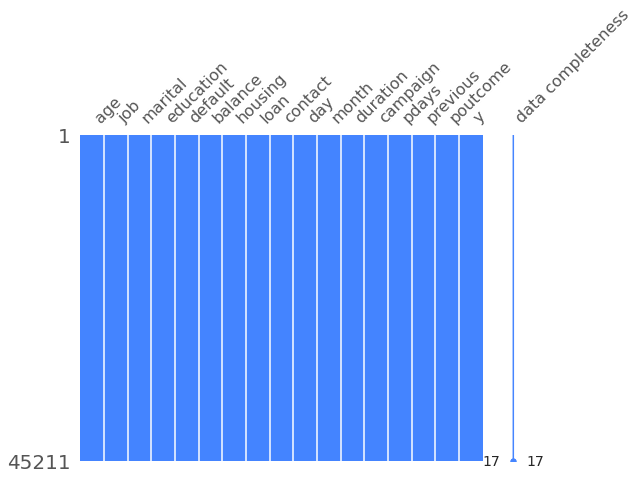

In [ ]:
msno.matrix(bank, labels=True, sort='descending', color=(0.27, 0.52, 1.0), figsize= (8,6));

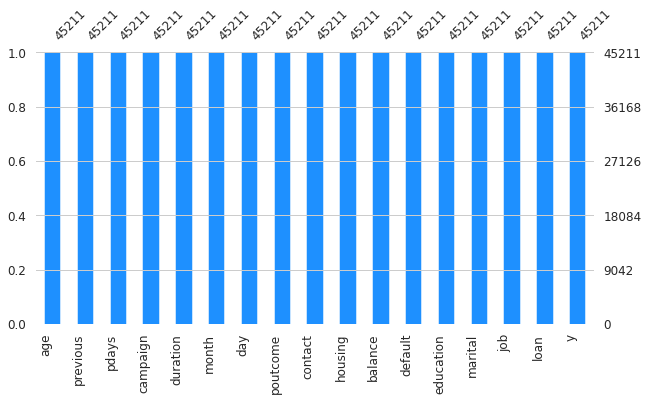

In [ ]:
g = msno.bar(bank, labels=True, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90);

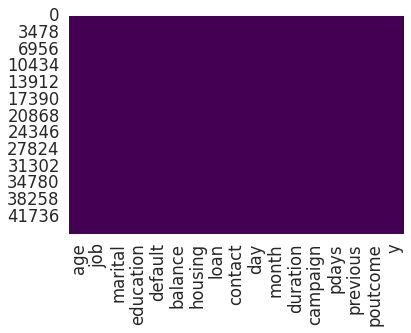

In [ ]:
sns.heatmap(bank.isnull(),cbar=False,cmap='viridis')

## **4.2.2. Per feature**

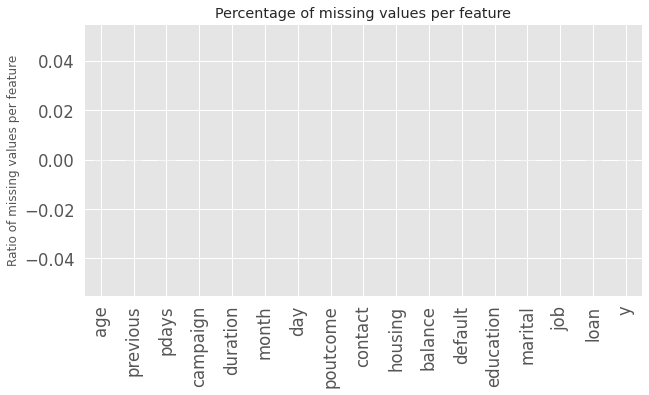

In [ ]:
bank.isna().mean().sort_values().plot(
    kind="bar", figsize=(10, 5),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

## **4.3. Unwanted entries and recording errors**

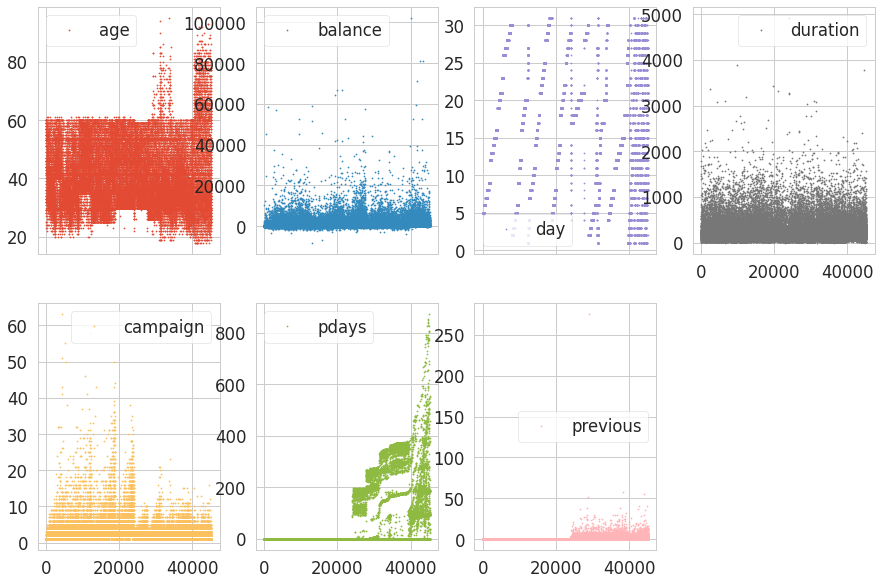

In [ ]:
bank.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 10), markersize=1.5);

## **4.3.2. Non-numerical features**

In [ ]:
#Extract descriptive properties of non-numerical features
bank.describe(exclude=["number", "datetime"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


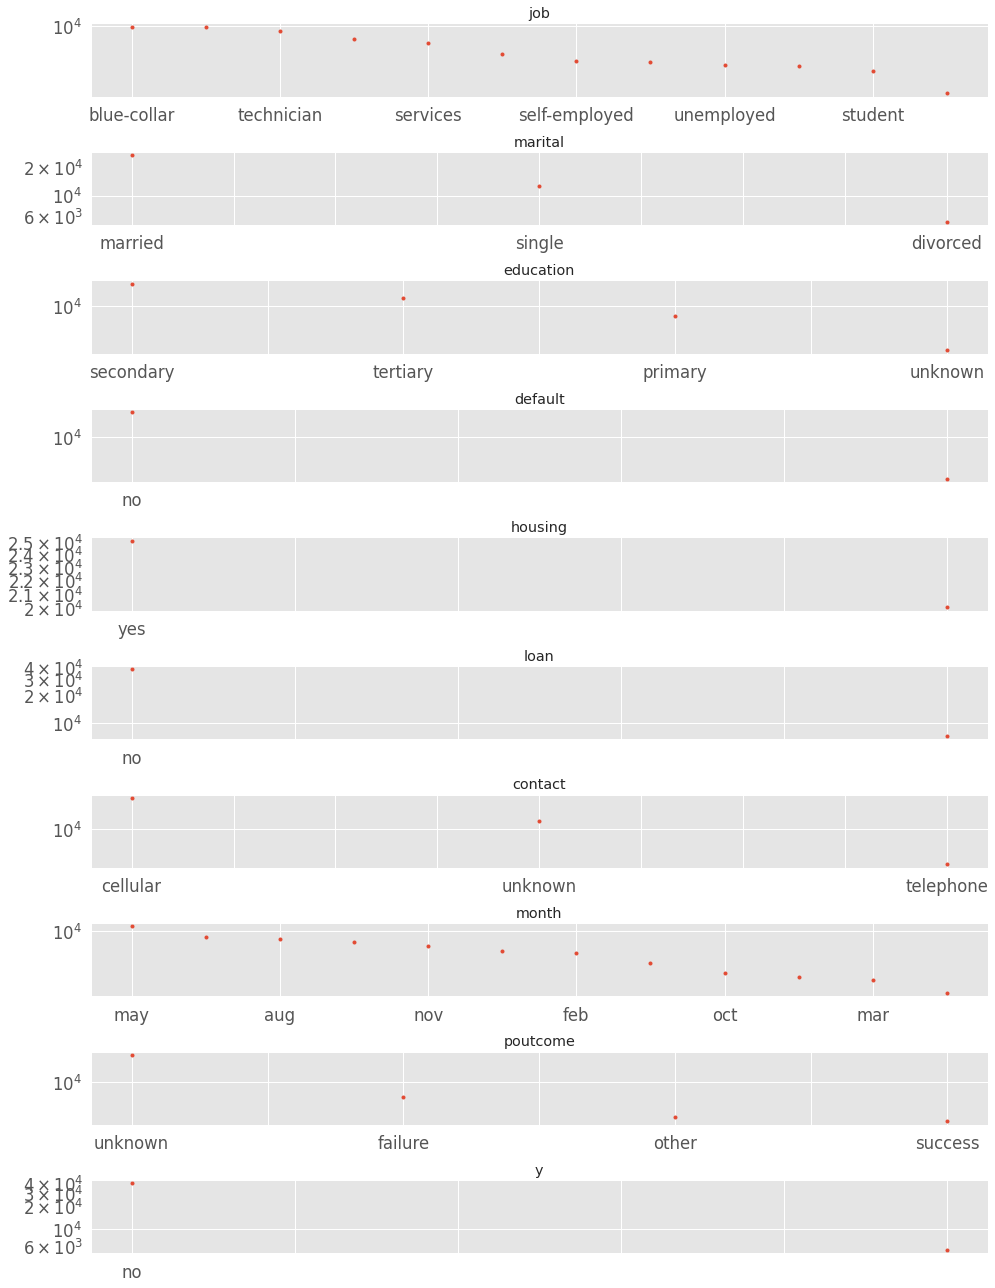

In [ ]:
#Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=10, figsize=(14, 18))

#Identify non-numerical features
df_non_numerical = bank.select_dtypes(exclude=["number", "datetime"])

#Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    #Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        #Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

## **4.4. Conclusion of quality investigation**

### *Note: We have no duplicate rows and missing values in our initial dataset. Observing the variable 'duration', we have to deal with the outliers. The case for the variable 'age' is the same - we have to further investigate and deal with possible outliers. Missing values from initial dataset do not exist, but if we dive deeper to each of the variables, there are 'unknown' values. We will take a look into each variables on section 6.0*

## **5. Content Investigation**

## **5.1. Feature distribution**

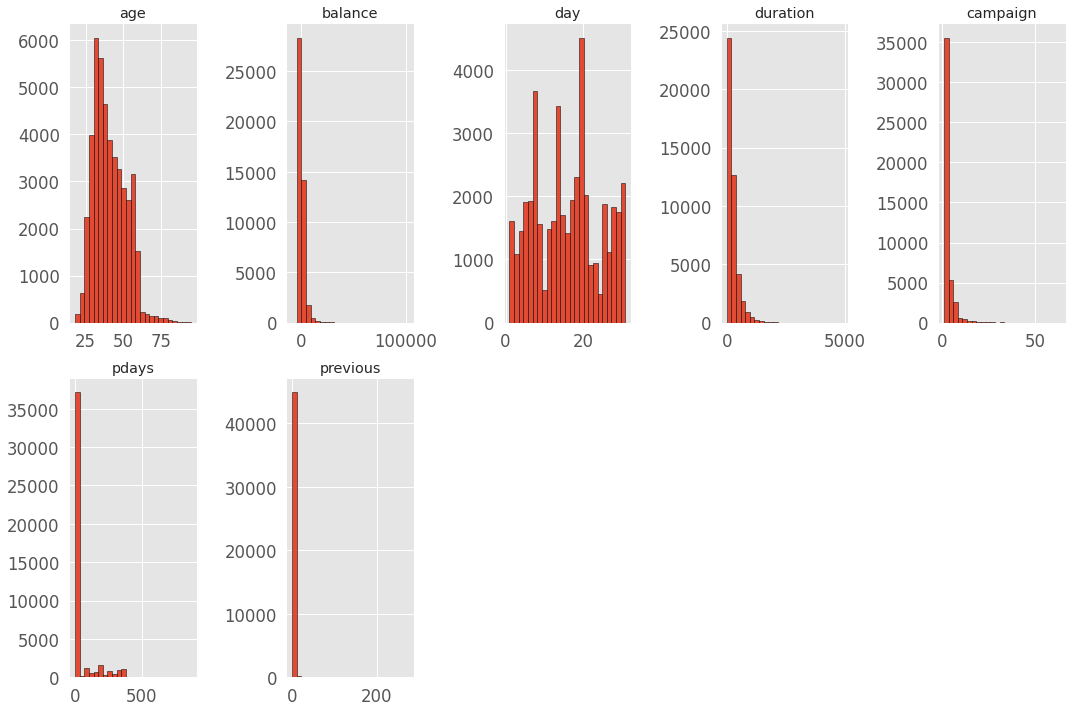

In [ ]:
#Plots the histogram for each numerical feature in a separate subplot
bank.hist(bins=25, figsize=(15, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

default     0.981973
y           0.883015
loan        0.839774
poutcome    0.817478
previous    0.817367
dtype: float64

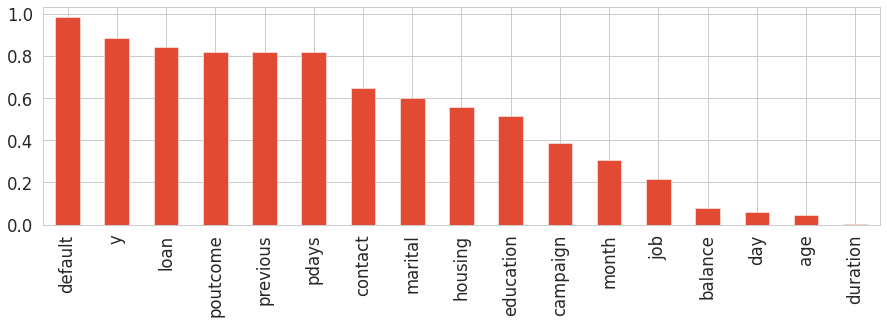

In [ ]:
#Collects for each feature the most frequent entry
most_frequent_entry = bank.mode()

#Checks for each entry if it contains the most frequent entry
df_freq = bank.eq(most_frequent_entry.values, axis=1)

#Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

#Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

#Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

## **5.2. Feature patterns**

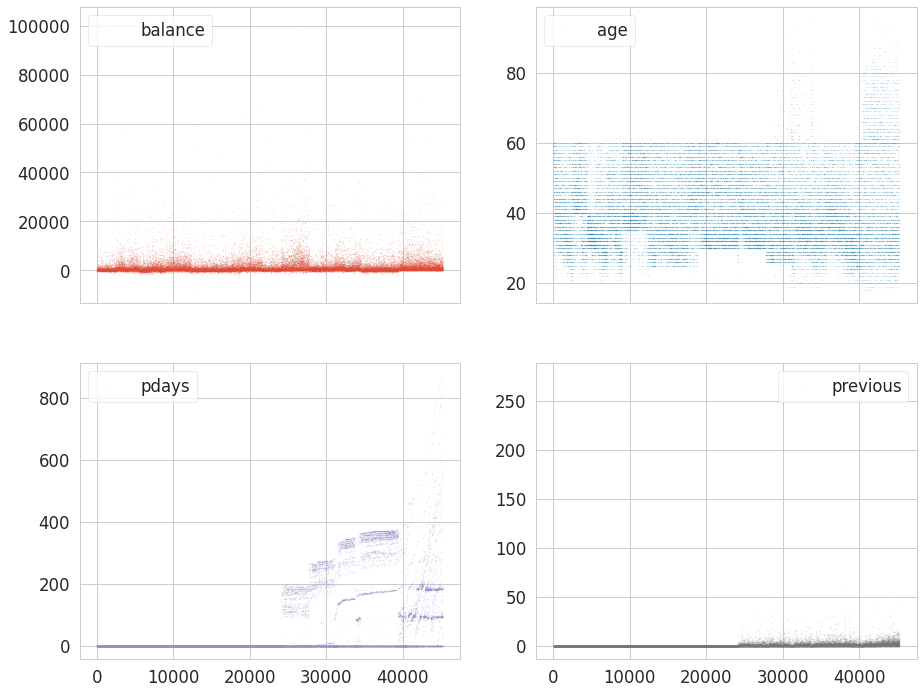

In [ ]:
bank[["balance", "age",
      "pdays", "previous"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 12));

In [ ]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = bank.select_dtypes(include="number").nunique() >= 100
cols_continuous

age         False
balance      True
day         False
duration     True
campaign    False
pdays        True
previous    False
dtype: bool

## **5.2.1. Continuous features**

In [ ]:
#Create a new dataframe which only contains the continuous features
bank_continuous = bank[cols_continuous[cols_continuous].index]
bank_continuous.shape

(45211, 3)

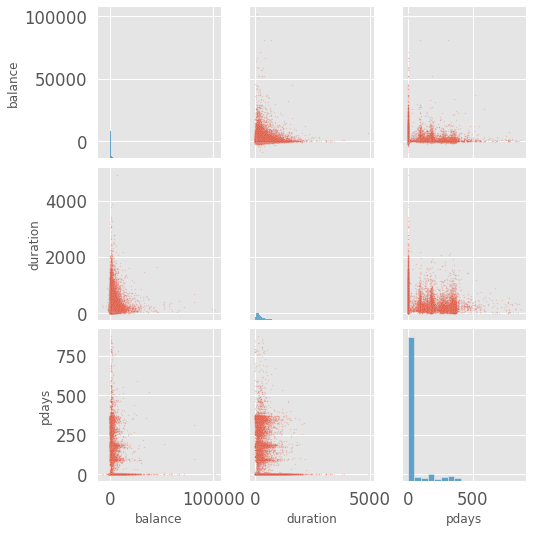

In [ ]:
sns.pairplot(bank_continuous, height=2.5, plot_kws={"s": 2, "alpha": 0.2});

## **5.2.2. Discreet and Ordinal features**

In [ ]:
# Create a new dataframe which doesn't contain the numerical continuous features
bank_discrete = bank[cols_continuous[~cols_continuous].index]
bank_discrete.shape

(45211, 4)

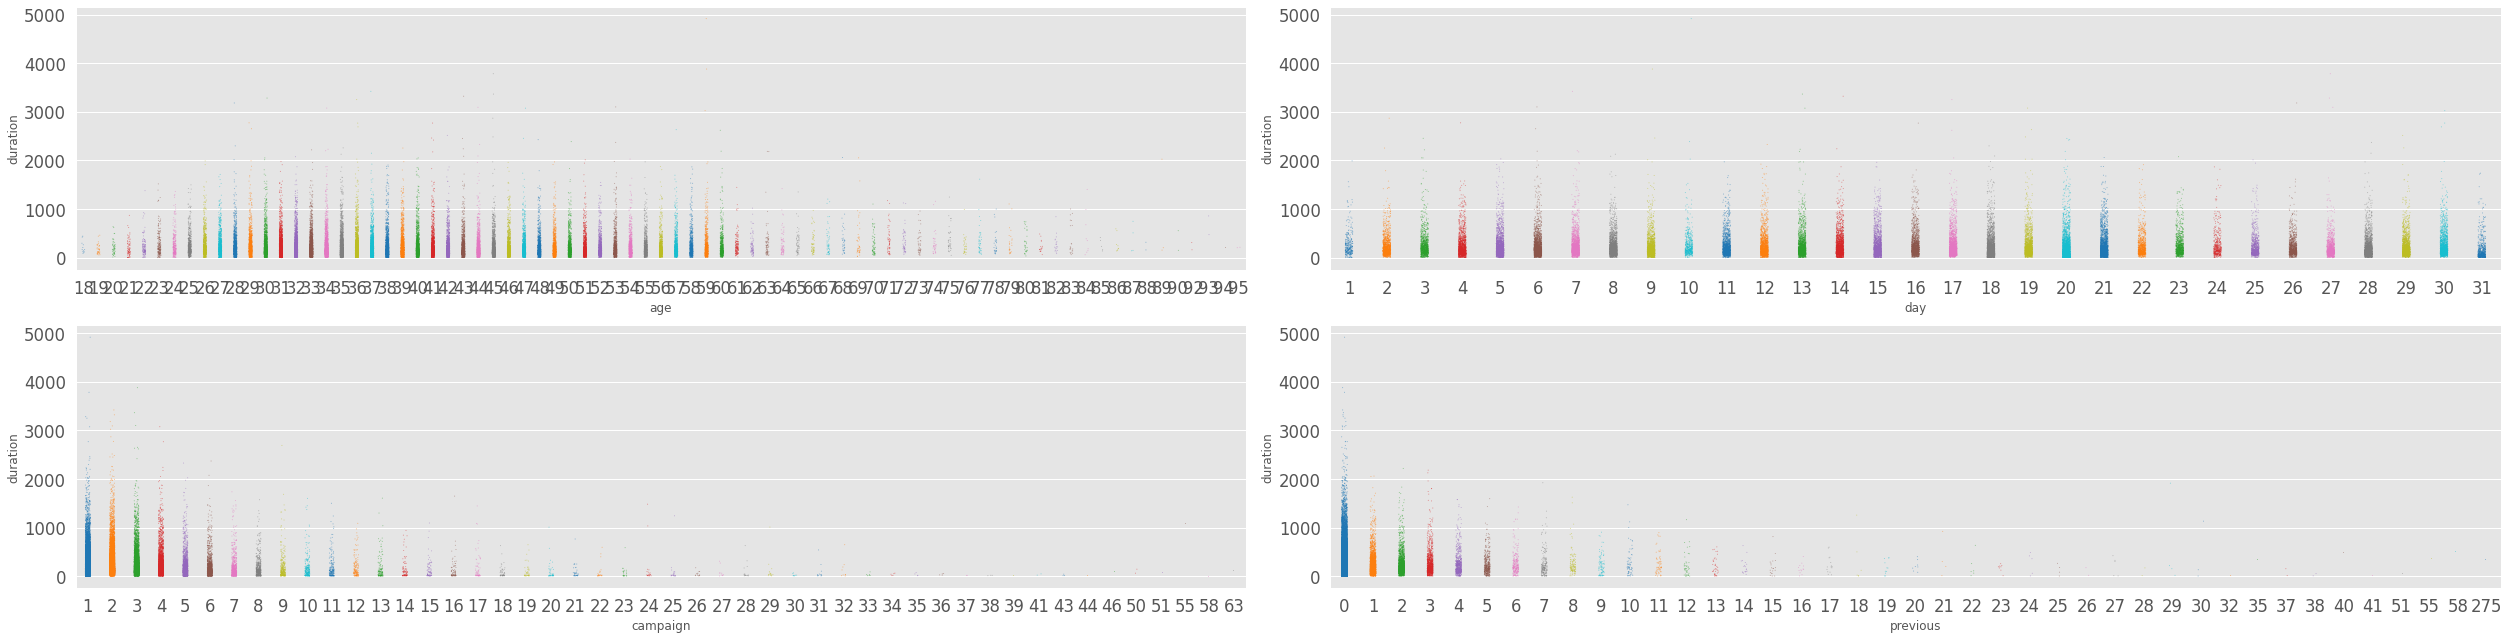

In [ ]:
#Establish number of columns and rows needed to plot all features
n_cols = 2
n_elements = len(bank_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

#Specify y_value to spread data (ideally a continuous feature)
y_value = bank["duration"]

#Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(35, n_rows * 4.5))

#Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(bank_discrete.columns, axes.ravel()):
    sns.stripplot(data=bank, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

## **5.3. Feature relationships**

In [ ]:
#Computes feature correlation
bank_corr = bank.corr(method="pearson")

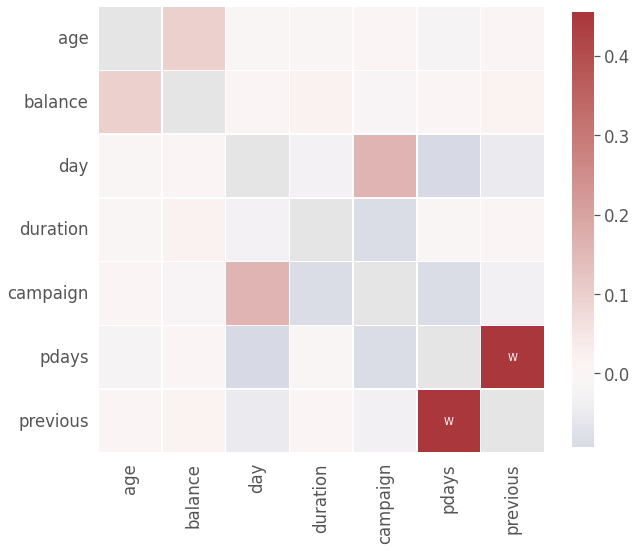

In [ ]:
#Create labels for the correlation matrix
labels = np.where(np.abs(bank_corr)>0.75, "S",
                  np.where(np.abs(bank_corr)>0.5, "M",
                           np.where(np.abs(bank_corr)>0.25, "W", "")))

#Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(bank_corr, mask=np.eye(len(bank_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

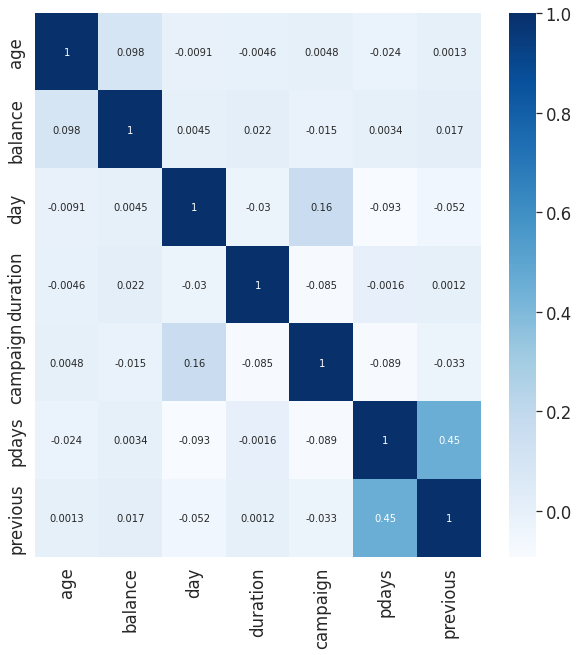

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(bank.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(bank_corr.shape), k=-1).astype("bool")

#Stack all correlations, after applying the mask
bank_corr_stacked = bank_corr.where(lower_triangle_mask).stack().sort_values()

#Showing the lowest and highest correlations in the correlation matrix
display(bank_corr_stacked)

pdays     day        -0.093044
          campaign   -0.088628
campaign  duration   -0.084570
previous  day        -0.051710
          campaign   -0.032855
duration  day        -0.030206
pdays     age        -0.023758
campaign  balance    -0.014578
day       age        -0.009120
duration  age        -0.004648
pdays     duration   -0.001565
previous  duration    0.001203
          age         0.001288
pdays     balance     0.003435
day       balance     0.004503
campaign  age         0.004760
previous  balance     0.016674
duration  balance     0.021560
balance   age         0.097783
campaign  day         0.162490
previous  pdays       0.454820
dtype: float64

## **5.4. Conclusion of content investigation**

## *Note: Initially, the variables 'pdays' and 'previous' are moderately correlated; no variables seem to be highy correlated.*

## **6.0. More thorough Investigations**

In [ ]:
#Investigating 'unknown' values
print("# Missing value 'age' variable: {0}".format(len(bank.loc[bank['age'] == "unknown"])))
print("# Missing value 'job' variable: {0}".format(len(bank.loc[bank['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(bank.loc[bank['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(bank.loc[bank['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(bank.loc[bank['default'] == "unknown"])))
print("# Missing value 'balance' variable: {0}".format(len(bank.loc[bank['balance'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(bank.loc[bank['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(bank.loc[bank['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(bank.loc[bank['contact'] == "unknown"])))
print("# Missing value 'day' variable: {0}".format(len(bank.loc[bank['day'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(bank.loc[bank['month'] == "unknown"])))
print("# Missing value 'duration' variable: {0}".format(len(bank.loc[bank['duration'] == "unknown"])))
print("# Missing value 'campaign' variable: {0}".format(len(bank.loc[bank['campaign'] == "unknown"])))
print("# Missing value 'pdays' variable: {0}".format(len(bank.loc[bank['pdays'] == "unknown"])))
print("# Missing value 'previous' variable: {0}".format(len(bank.loc[bank['previous'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(bank.loc[bank['poutcome'] == "unknown"])))

# Missing value 'age' variable: 0
# Missing value 'job' variable: 288
# Missing value 'marital' variable: 0
# Missing value 'education' variable: 1857
# Missing value 'default' variable: 0
# Missing value 'balance' variable: 0
# Missing value 'housing' variable: 0
# Missing value 'loan' variable: 0
# Missing value 'contact' variable: 13020
# Missing value 'day' variable: 0
# Missing value 'month' variable: 0
# Missing value 'duration' variable: 0
# Missing value 'campaign' variable: 0
# Missing value 'pdays' variable: 0
# Missing value 'previous' variable: 0
# Missing value 'poutcome' variable: 36959


## *Percentage of 'unknown' : Jobs*

In [ ]:
bank['job'].value_counts(normalize=True) * 100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

## *Percentage of 'unknown' : Education*

In [ ]:
bank['education'].value_counts(normalize=True) * 100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

## *Percentage of 'unknown' : Contact*

In [ ]:
bank['contact'].value_counts(normalize=True) * 100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

## *Percentage of 'unknown' : Poutcome*

In [ ]:
bank['poutcome'].value_counts(normalize=True) * 100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

In [ ]:
#Finding the unique values of y
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#How many people(client) have subscribed to a term deposit?    
bank.y.value_counts() 

no     39922
yes     5289
Name: y, dtype: int64

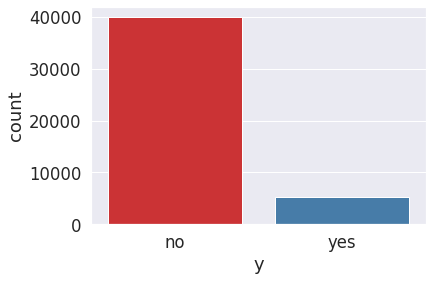

In [ ]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=bank, palette ='Set1')
plt.show()

## **Checking for class imbalance**

In [ ]:
class_values = (bank['y'].value_counts()/bank['y'].value_counts().sum())*100
print(class_values)

no     88.30152
yes    11.69848
Name: y, dtype: float64


## *Note: The class distribution in the target is 88:12. This is a clear indication of imbalance.*

## **Outliers**

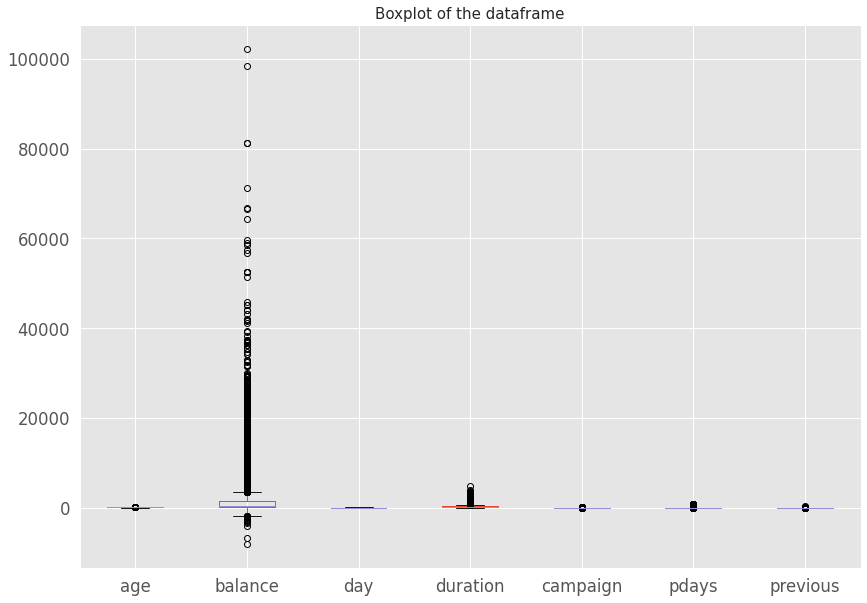

In [ ]:
#Checking for outliers in dataset
plt.figure(figsize=(14,10))
bank.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

### *Note: The variable 'balance' and 'duration' seems to have outliers. If we drop 'balance', the variable 'duration' will have obvious outliers.*

## **Univariate Analysis of Categorical Columns**

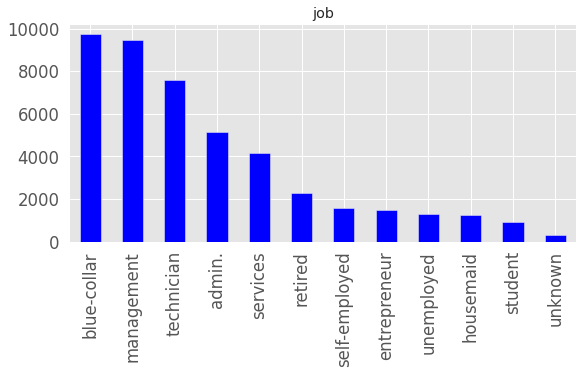

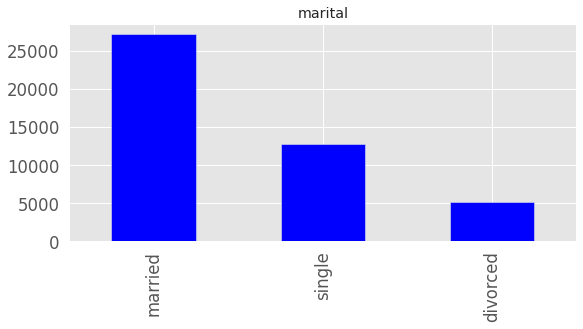

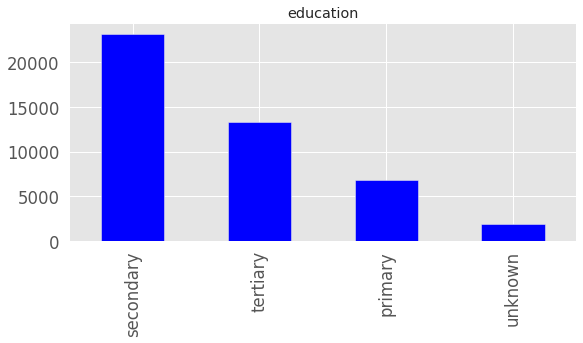

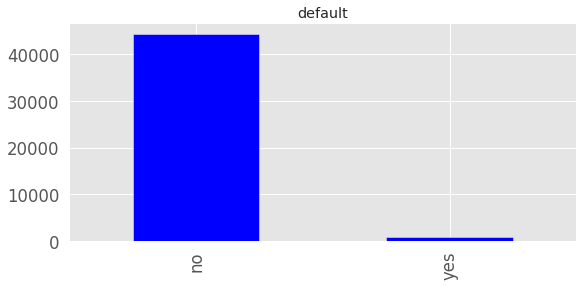

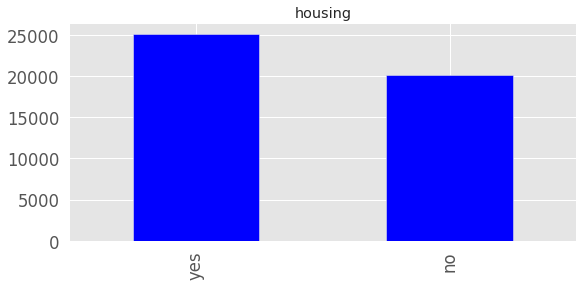

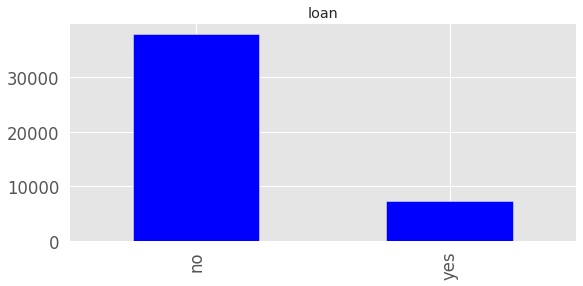

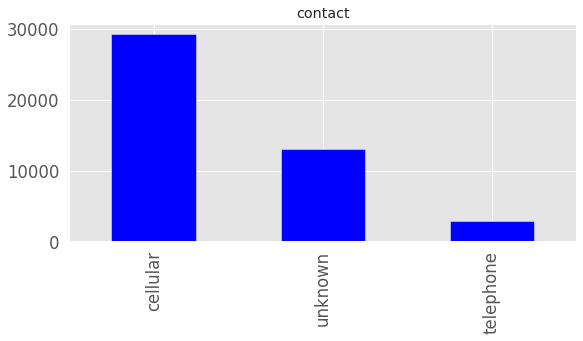

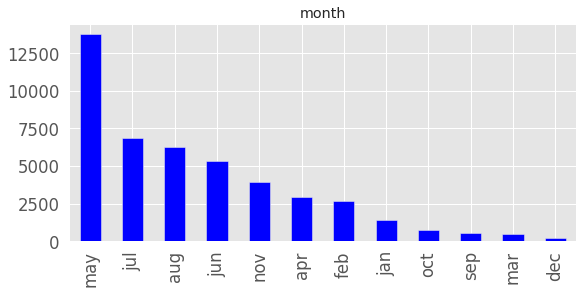

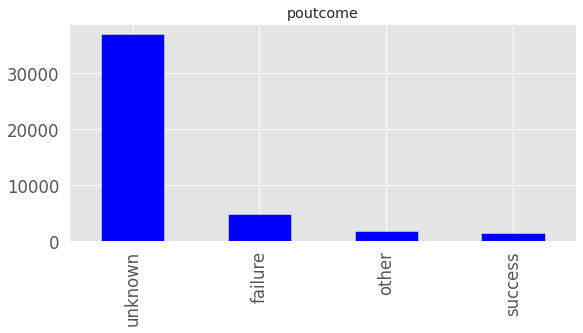

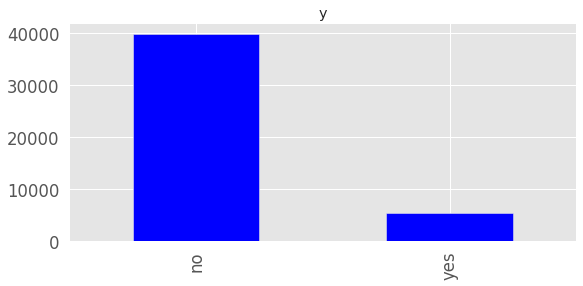

In [ ]:
#Selecting the categorical columns
categorical_col = bank.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
#Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    bank[column].value_counts().plot(kind='bar', color='blue')
    plt.title(column)

## *Note: From the above visuals, we can make the following observations:*

* The customers' top three occupations are administration, blue-collar jobs, and technicians. 
*   A large proportion of the consumers are married. 
*   The vast majority of clients do not have a credit card in default. 
*   Many of the previous customers applied for a home loan, while very few applied for personal loans. 
*   Cell phones appear to be the most popular technique of contacting clients. 
*   In the month of May, many clients were contacted. 
* The plot for the target variable reveals a significant imbalance in the target variable.
*   Some columns' missing values have been marked as unknown. Unknown denotes missing data. These values will be addressed next.










## **Univariate Analysis of Continuous Columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

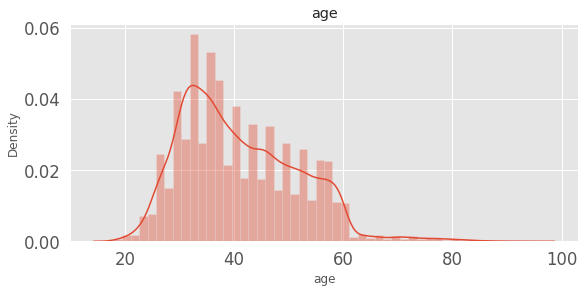

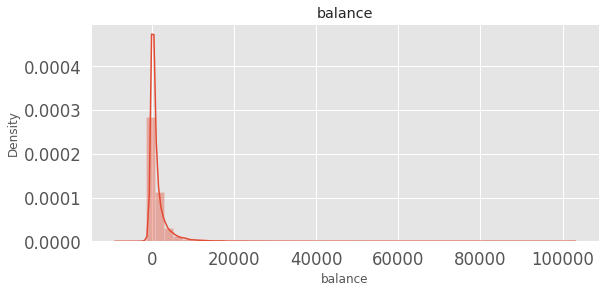

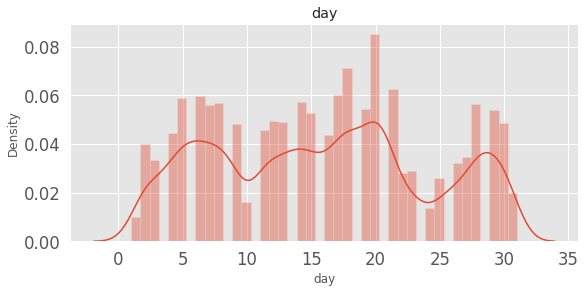

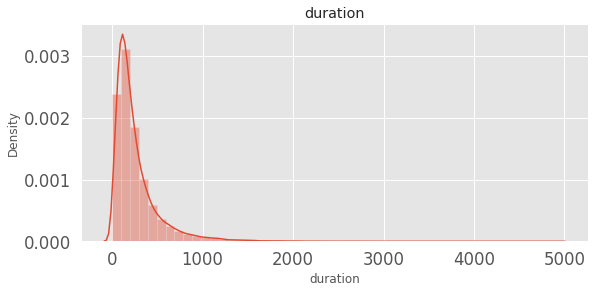

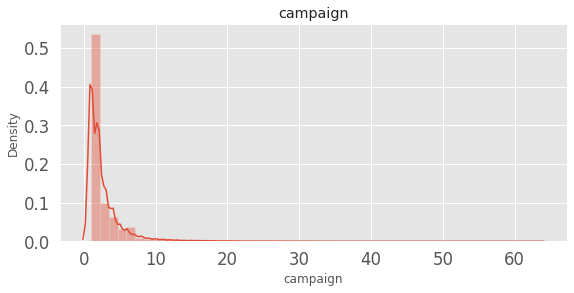

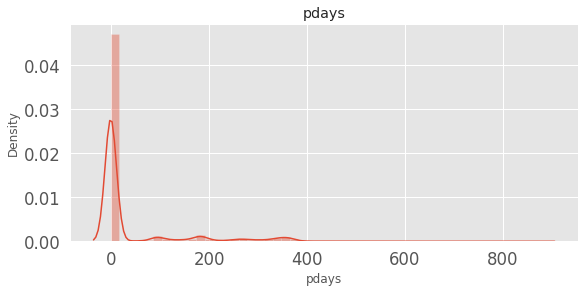

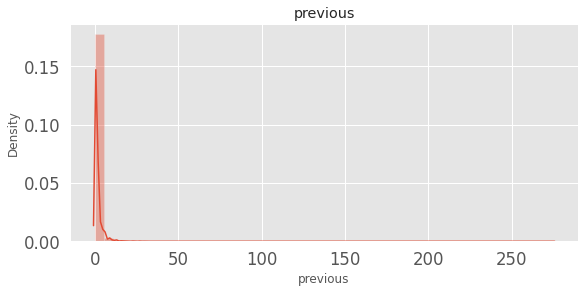

In [ ]:
#Select_dtypes selects data with numeric features
numeric_data = bank.select_dtypes(include=np.number)
#We will store the numeric features in a variable
numeric_col = numeric_data.columns                        

for column in numeric_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(bank[column])
    plt.title(column)

## **Bivariate Analysis of Categorical Columns**

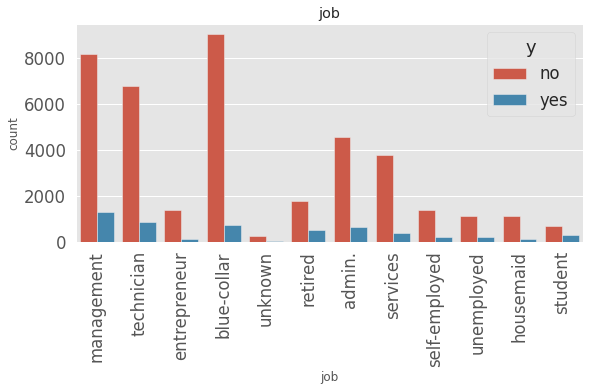

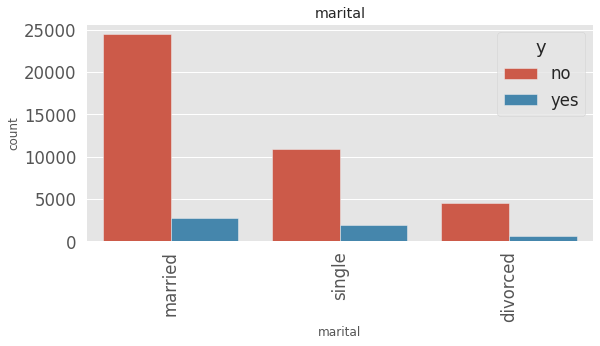

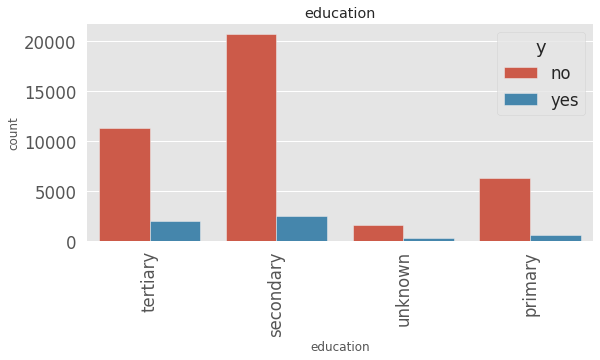

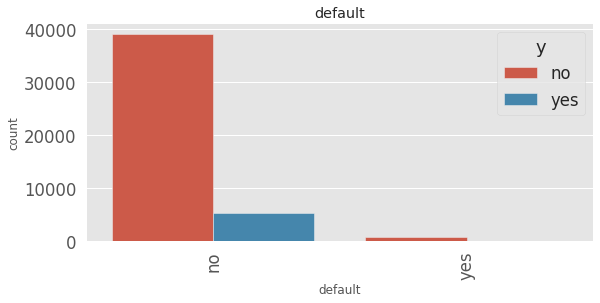

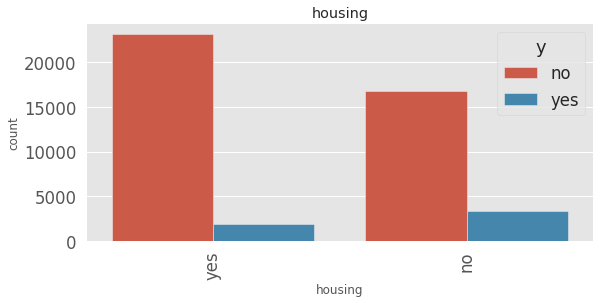

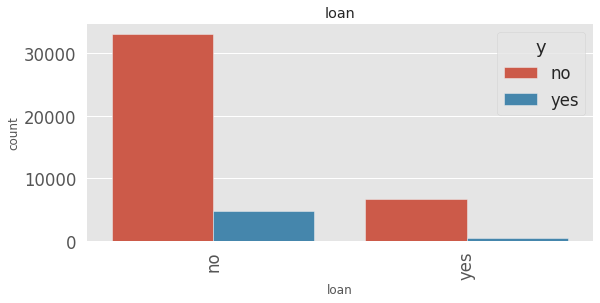

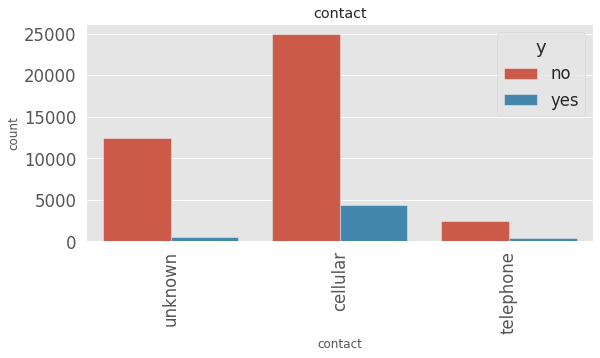

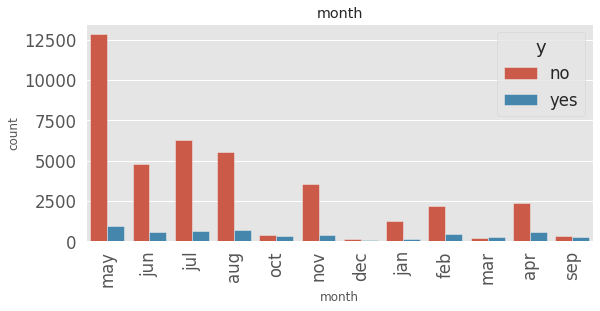

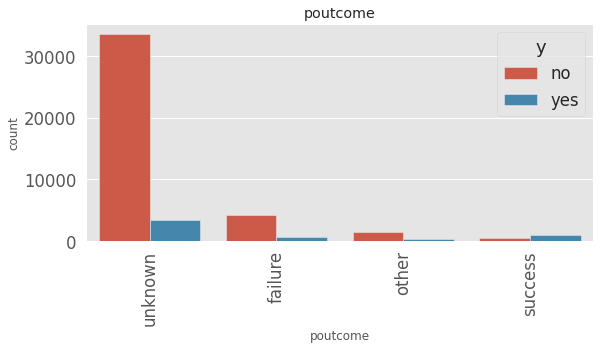

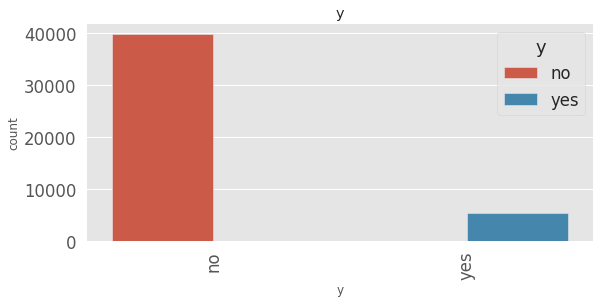

In [ ]:
#We will exclude data with numeric features
categorical_data = bank.select_dtypes(exclude=np.number) 
#We will store the categorical features in a variable
categorical_col = categorical_data.columns      

for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=bank[column],hue=bank['y'],data=bank)
    plt.title(column)    
    plt.xticks(rotation=90)

## *Note: Customers who have signed up for a term deposit share the following characteristics:*

*   Customers with administrative occupations make up the majority of individuals who have subscribed to the term deposit, with technicians coming in second.
*  They are married, have a university degree, and have no credit in default. 
*  Housing loan does not appear to be a priority to investigate because an equal amount of consumers who have and have not subscribed to it appear to have subscribed to term deposit. 
*   When contacting clients, cell phones should be the preferred form of communication.



 



## *Things to consider prior modeling:*

*   Deal with missing values (i.e. 'unknown' data)
*   Rename column names if necessary
*   Rename 'admin' job type (it has a dot after the word "admin")
*   Deal with outliers







SMOTE - imbalance of variables
decide - either drop or include Unknown - 

## *Next Steps to Perform:*

*   When dealing with outliers, we may perform imputation or just drop the whole column if we find it not helpful or relevant.
*   Extract some variables. For example, the variable 'job'. Create a new dataframe that contains extracted different job types.
*   Perform Analysis, try at least 2-3 predictive modeling techniques.
*   Compare the results of these predictive modeling techniques.





# END OF EXPLORATORY DATA ANALYSIS

*Submitted by:*

*   Glen George A. Bautista
*   Maria Paula Sanchez Galindo

